In [1]:
pip install numpy matplotlib scikit-learn


### ***Description of the Clustering Visualization***Clustering algorithms are powerful tools for identifying patterns and structures in data, but the process of cluster formation is often opaque. To demystify this, I created a dynamic animation that vividly illustrates how clustering evolves over iterations. Starting with randomly initialized centroids, the animation captures the interplay of points and centroids as clusters gradually stabilize, even in complex, overlapping datasets.

Key Highlights:

Randomized centroid initialization creates challenging scenarios for clustering.
The dynamic adjustment of centroids demonstrates the iterative refinement of the clustering process.
The shaded regions around clusters provide an intuitive understanding of their boundaries and variability.

In [2]:
from sklearn.datasets import make_blobs
import numpy as np

# Generate synthetic data
n_samples = 10000
n_features = 2
n_clusters = 6

data, labels = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, cluster_std=2.0, random_state=42)


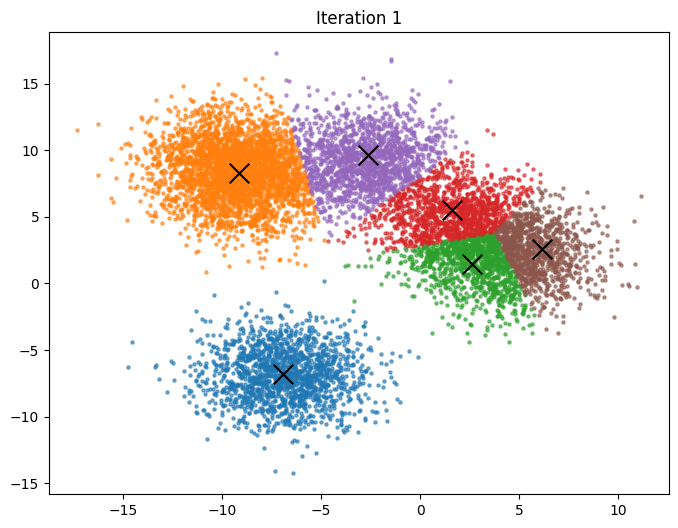

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# KMeans model with random initialization
kmeans = KMeans(n_clusters=n_clusters, init='random', max_iter=1, n_init=1, random_state=42)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.tab10(range(n_clusters))

for iteration in range(220):  # Total iterations
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Plot points
    ax.clear()
    for cluster_idx in range(n_clusters):
        cluster_points = data[labels == cluster_idx]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, color=colors[cluster_idx], alpha=0.6)

    # Plot centroids with trails
    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='x')

    ax.set_title(f'Iteration {iteration + 1}')
    plt.pause(0.1)  # Pause for animation effect


In [4]:
from matplotlib.animation import FuncAnimation

def update(iteration):
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    ax.clear()
    for cluster_idx in range(n_clusters):
        cluster_points = data[labels == cluster_idx]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, color=colors[cluster_idx], alpha=0.6)

    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='x')
    ax.set_title(f'Iteration {iteration + 1}')

ani = FuncAnimation(fig, update, frames=220, interval=100)
ani.save('clustering_animation.mp4', writer='ffmpeg')


In [5]:
from matplotlib.animation import FuncAnimation

def update(iteration):
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    ax.clear()
    for cluster_idx in range(n_clusters):
        cluster_points = data[labels == cluster_idx]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, color=colors[cluster_idx], alpha=0.6)

    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='x')
    ax.set_title(f'Iteration {iteration + 1}')

ani = FuncAnimation(fig, update, frames=220, interval=100)
ani.save('clustering_animation.mp4', writer='ffmpeg')


<ipython-input-7-737da51e7b10>:40: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(centroids[cluster_idx, 0], centroids[cluster_idx, 1], s=200, color=colors[cluster_idx], edgecolor='black', marker='x')


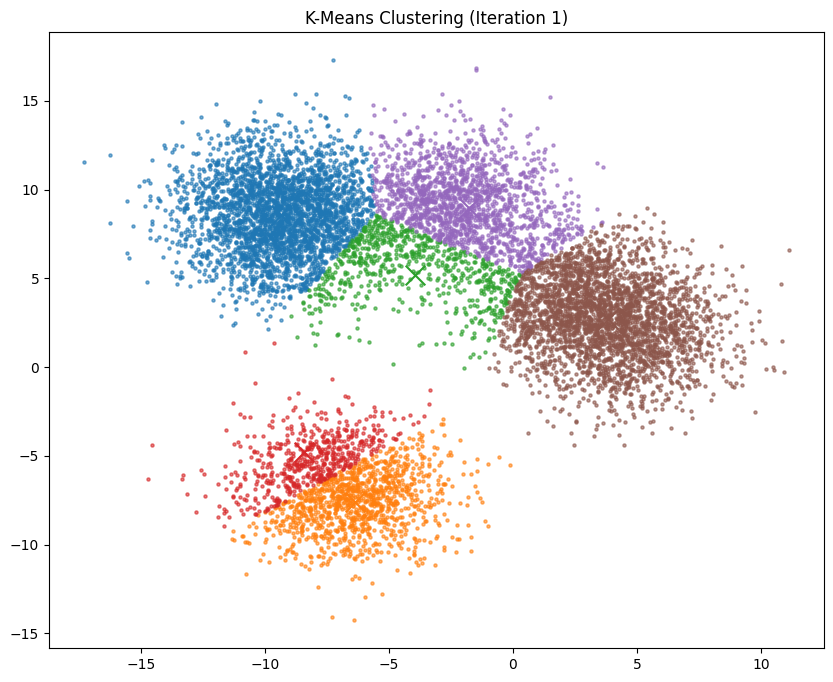

<ipython-input-7-737da51e7b10>:40: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(centroids[cluster_idx, 0], centroids[cluster_idx, 1], s=200, color=colors[cluster_idx], edgecolor='black', marker='x')
<ipython-input-7-737da51e7b10>:40: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(centroids[cluster_idx, 0], centroids[cluster_idx, 1], s=200, color=colors[cluster_idx], edgecolor='black', marker='x')
<ipython-input-7-737da51e7b10>:40: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(centroids[cluster_idx, 0], centroids[cl

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MiniBatchKMeans

# Generate synthetic data
n_samples = 10000
n_features = 2
n_clusters = 6

data, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, cluster_std=2.0, random_state=42)

# Initialize MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=n_clusters, init='random', batch_size=1000, random_state=42)

# Prepare for visualization
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.tab10(range(n_clusters))
centroid_trails = [[] for _ in range(n_clusters)]

for iteration in range(20):  # Number of iterations
    kmeans.partial_fit(data)  # Perform one iteration of MiniBatchKMeans
    centroids = kmeans.cluster_centers_
    labels = kmeans.predict(data)

    # Track centroid movement
    for idx, (x, y) in enumerate(centroids):
        centroid_trails[idx].append((x, y))

    # Plot data points
    ax.clear()
    for cluster_idx in range(n_clusters):
        cluster_points = data[labels == cluster_idx]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5, color=colors[cluster_idx], alpha=0.6)

    # Plot centroids with trails
    for cluster_idx, trail in enumerate(centroid_trails):
        trail_x, trail_y = zip(*trail)
        ax.plot(trail_x, trail_y, color=colors[cluster_idx], linestyle='--', alpha=0.8)
        ax.scatter(centroids[cluster_idx, 0], centroids[cluster_idx, 1], s=200, color=colors[cluster_idx], edgecolor='black', marker='x')

    ax.set_title(f"K-Means Clustering (Iteration {iteration + 1})")
    plt.pause(0.5)

plt.show()



Real-World Data: Try these techniques on real-world datasets like customer segmentation, image compression, or text clustering.
Dimensionality Reduction: Use PCA or t-SNE for clustering in high-dimensional spaces.
Advanced Metrics: Experiment with Davies-Bouldin Index, Dunn Index, or Calinski-Harabasz Score for cluster evaluation.

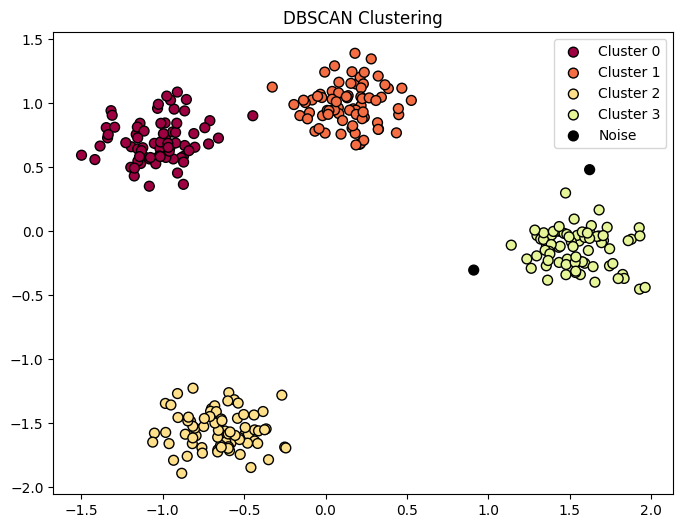

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
data = StandardScaler().fit_transform(data)  # Normalize data for DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels = dbscan.fit_predict(data)

# Visualize clusters
unique_labels = set(labels)
fig, ax = plt.subplots(figsize=(8, 6))

for label in unique_labels:
    if label == -1:
        color = "black"  # Noise points
        label_name = "Noise"
    else:
        color = plt.cm.Spectral(float(label) / len(unique_labels))
        label_name = f"Cluster {label}"
    points = data[labels == label]
    ax.scatter(points[:, 0], points[:, 1], label=label_name, c=[color] * len(points), edgecolor='k', s=50)

ax.set_title("DBSCAN Clustering")
ax.legend()
plt.show()


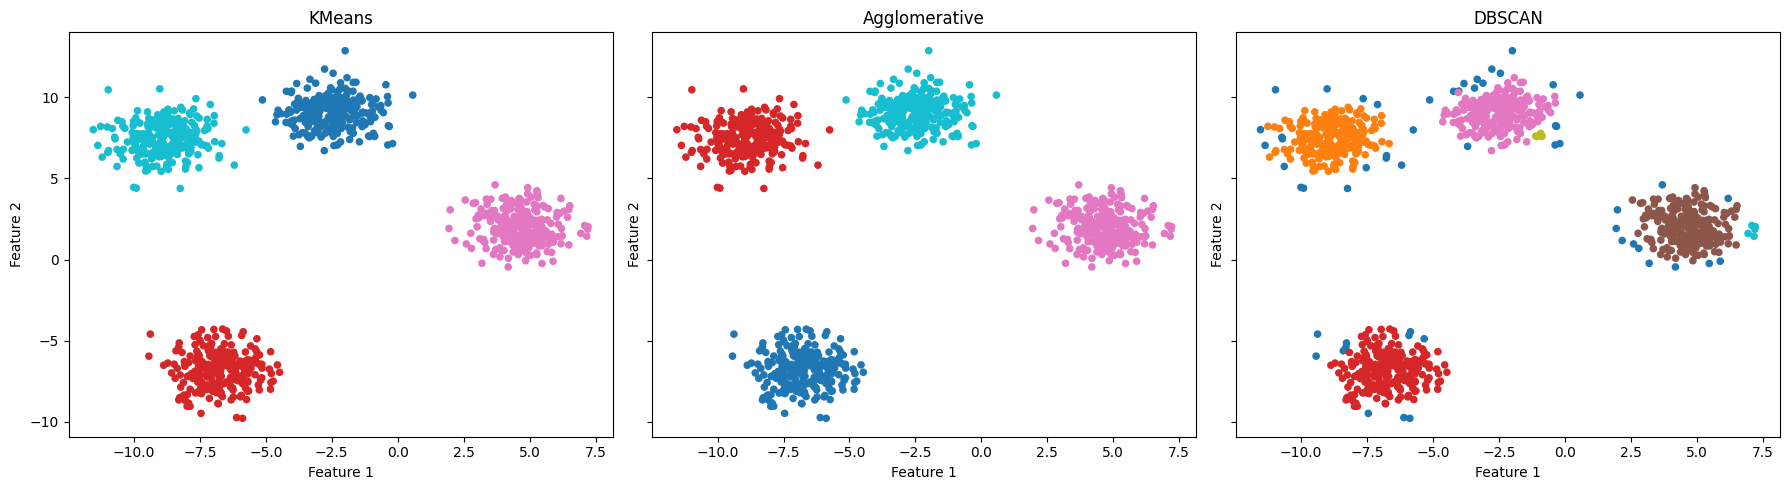

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 1000
n_features = 2
n_clusters = 4

data, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# Define models for comparison
models = {
    "KMeans": KMeans(n_clusters=n_clusters, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=n_clusters),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
}

# Plot comparison
fig, axes = plt.subplots(1, len(models), figsize=(18, 5), sharex=True, sharey=True)

for idx, (name, model) in enumerate(models.items()):
    if hasattr(model, "fit_predict"):  # Use fit_predict if available
        labels = model.fit_predict(data)
    else:  # Otherwise, fit the model and directly retrieve labels (not used here)
        labels = model.fit(data).labels_

    # Plot clusters
    ax = axes[idx]
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap="tab10", s=20)
    ax.set_title(name)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [11]:
from ipywidgets import interact
from sklearn.cluster import KMeans

def interactive_clustering(n_clusters):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=20)
    plt.title(f"K-Means with {n_clusters} Clusters")
    plt.show()

interact(interactive_clustering, n_clusters=(2, 10))


interactive(children=(IntSlider(value=6, description='n_clusters', max=10, min=2), Output()), _dom_classes=('w…

<function __main__.interactive_clustering(n_clusters)>

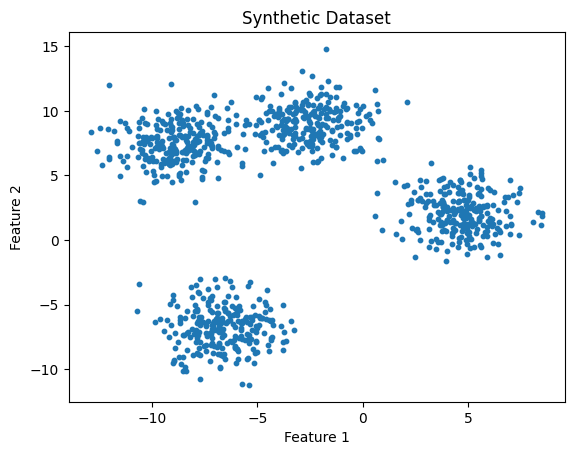

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 1000
n_features = 2
n_clusters = 4
data, _ = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=1.5, random_state=42)

# Plot the dataset
plt.scatter(data[:, 0], data[:, 1], s=10)
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Initialize clustering models
models = {
    "KMeans": KMeans(n_clusters=n_clusters, random_state=42),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=n_clusters),
    "DBSCAN": DBSCAN(eps=1.2, min_samples=5),
}


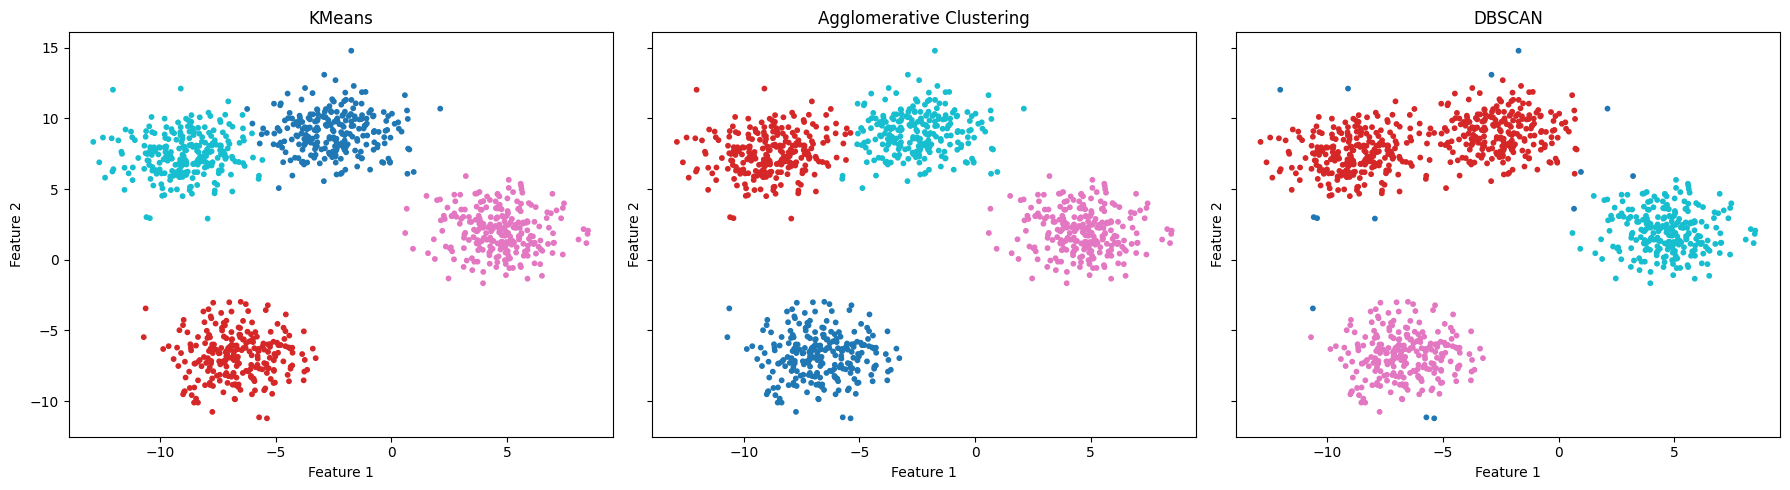

In [14]:
fig, axes = plt.subplots(1, len(models), figsize=(18, 5), sharex=True, sharey=True)

for idx, (name, model) in enumerate(models.items()):
    labels = model.fit_predict(data) if hasattr(model, "fit_predict") else model.fit(data).labels_

    ax = axes[idx]
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap="tab10", s=10)
    ax.set_title(name)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


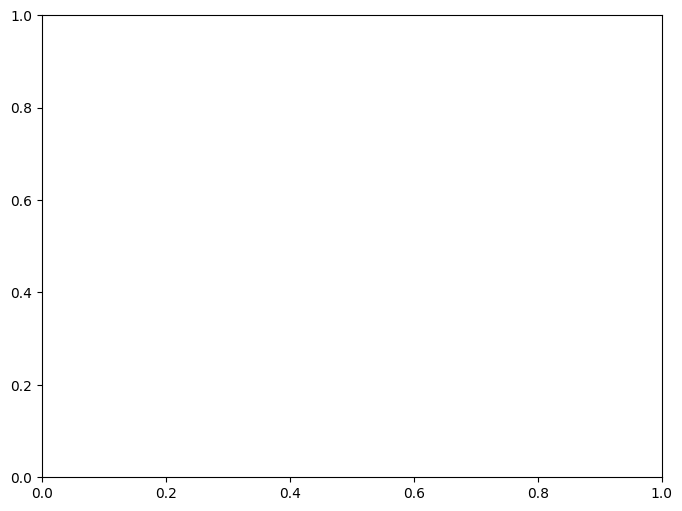

In [15]:
from matplotlib.animation import FuncAnimation

# Initialize KMeans with random centroids
kmeans = KMeans(n_clusters=n_clusters, init="random", n_init=1, max_iter=1, random_state=42)
centroid_trails = [[] for _ in range(n_clusters)]

fig, ax = plt.subplots(figsize=(8, 6))

def update(iteration):
    global kmeans
    kmeans.max_iter = iteration + 1
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    ax.clear()
    for i, trail in enumerate(centroid_trails):
        trail.append((centroids[i, 0], centroids[i, 1]))
        trail_x, trail_y = zip(*trail)
        ax.plot(trail_x, trail_y, linestyle="--", alpha=0.6, label=f"Centroid {i+1}")

    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap="tab10", s=10)
    ax.scatter(centroids[:, 0], centroids[:, 1], color="black", marker="x", s=100, label="Centroids")
    ax.legend()
    ax.set_title(f"K-Means Clustering Iteration {iteration + 1}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

ani = FuncAnimation(fig, update, frames=10, interval=1000)
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


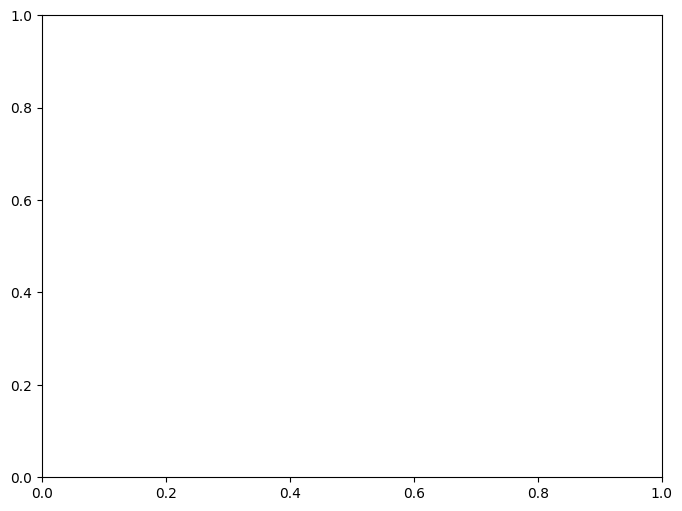

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
n_samples = 1000
n_features = 2
n_clusters = 4
data, _ = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=1.5, random_state=42)

# Initialize KMeans with random centroids
kmeans = KMeans(n_clusters=n_clusters, init="random", n_init=1, max_iter=1, random_state=42)
centroid_trails = [[] for _ in range(n_clusters)]

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

def update(iteration):
    """
    Update function for animation.
    """
    global kmeans
    kmeans.max_iter = iteration + 1
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Clear previous frame
    ax.clear()

    # Plot centroid trails
    for i, trail in enumerate(centroid_trails):
        trail.append((centroids[i, 0], centroids[i, 1]))
        trail_x, trail_y = zip(*trail)
        ax.plot(trail_x, trail_y, linestyle="--", alpha=0.6, label=f"Centroid {i+1}")

    # Plot data points and centroids
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap="tab10", s=10)
    ax.scatter(centroids[:, 0], centroids[:, 1], color="black", marker="x", s=100, label="Centroids")
    ax.legend()
    ax.set_title(f"K-Means Clustering Iteration {iteration + 1}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Create animation
num_iterations = 10
ani = FuncAnimation(fig, update, frames=num_iterations, interval=1000)

# Show animation
plt.show()

# Save animation as video
ani.save("kmeans_clustering.mp4", writer="ffmpeg", fps=1)  # Requires FFmpeg


In [17]:
pip install numpy matplotlib scikit-learn ffmpeg-python


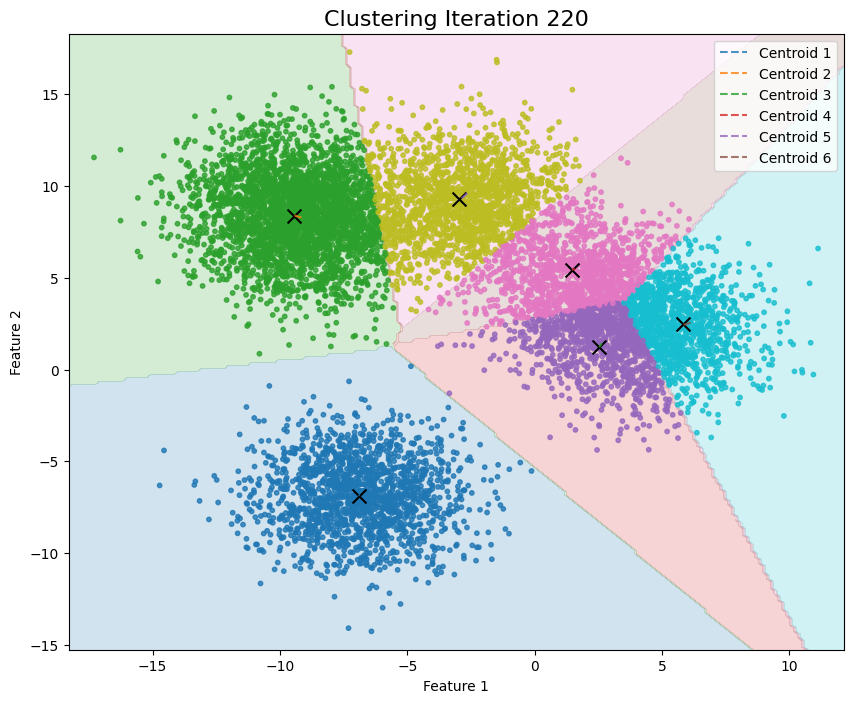

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Configuration
n_samples = 10000
n_features = 2
n_clusters = 6
n_iterations = 220
learning_rate = 0.1

# Generate synthetic dataset
data, _ = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=2.0, random_state=42)

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, init="random", n_init=1, max_iter=1, random_state=42)
centroid_trails = [[] for _ in range(n_clusters)]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))

def update(iteration):
    """
    Update function for animation.
    """
    global kmeans
    kmeans.max_iter = iteration + 1  # Gradually increase iterations
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Clear previous frame
    ax.clear()

    # Plot shaded regions (decision boundaries)
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2, cmap="tab10")

    # Plot data points
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap="tab10", s=10, alpha=0.8)

    # Plot centroids and their trails
    for i, trail in enumerate(centroid_trails):
        trail.append((centroids[i, 0], centroids[i, 1]))
        trail_x, trail_y = zip(*trail)
        ax.plot(trail_x, trail_y, linestyle="--", alpha=0.8, label=f"Centroid {i+1}")
        ax.scatter(centroids[i, 0], centroids[i, 1], color="black", marker="x", s=100)

    ax.set_title(f"Clustering Iteration {iteration + 1}", fontsize=16)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()

# Create animation
ani = FuncAnimation(fig, update, frames=n_iterations, interval=100)

# Save as video
ani.save("clustering_animation.mp4", writer="ffmpeg", fps=30)

plt.show()


In [21]:
video_path = "/content/Screen Recording 2025-01-21 212125.mp4"


In [24]:
!apt-get install ffmpeg
!pip install matplotlib ffmpeg-python


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
